In [0]:
from keras.datasets import mnist 
import seaborn as sns

# If keras is not using tensorflow as backend set "KERAS_BACKEND=tensorflow" by this command

Using TensorFlow backend.


In [0]:
import matplotlib.pyplot as plt
import numpy as np

# Function to update the plots for each epoch and error
# vl = Validation Loss (Test)  trl = Train loss (Maybe)

def plot( x, vl, trl, ax ):
    ax.plot(x, vl, 'b', label="Validation Loss")
    ax.plot(x, trl, 'r', label="Train Loss")
    plt.legend()
    plt.grid()
    fig.canvas.draw()
    
# Ref : https://gist.github.com/greydanus/f6eee59eaf1d90fcb3b534a25362cea4
# Ref : https://stackoverflow.com/a/14434334

In [0]:
( xtr, ytr ) , ( xte, yte ) = mnist.load_data()

11493376/11490434 [==============================] - 1s 0us/step


In [0]:
print(" No. of training points : ", xtr.shape[0], " and each image is of shape : ", xtr.shape[1:] )
print(" No. of test points : ", xte.shape[0], " and each image is of shape : ", xte.shape[1:] )

 No. of training points :  60000  and each image is of shape :  (28, 28)
 No. of test points :  10000  and each image is of shape :  (28, 28)


In [0]:
# Input shape its 2 dimensional vector for each image we have a (28*28) vector
# We will convert the (28*28) vector into single dimensional vector of 1 * 784 

xtr = xtr.reshape( xtr.shape[0], xtr.shape[1] * xtr.shape[2] ) 
xte = xte.reshape( xte.shape[0], xte.shape[1] * xte.shape[2] ) 

print( xtr.shape )
print( xte.shape )

(60000, 784)
(10000, 784)


In [0]:
print(" No. of training points : ", xtr.shape[0], " and each image is of shape : ", xtr.shape[1] )
print(" No. of test points : ", xte.shape[0], " and each image is of shape : ", xte.shape[1] )

 No. of training points :  60000  and each image is of shape :  784
 No. of test points :  10000  and each image is of shape :  784


In [0]:
print( xtr )
type( xtr )

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


numpy.ndarray

In [0]:
xtr[0][90:400]

array([  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,  18,  18,
        18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,  30,  36,  94, 154, 170,
       253, 253, 253, 253, 253, 225, 172, 253, 242, 195,  64,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,  49, 238, 253, 253,
       253, 253, 253, 253, 253, 253, 251,  93,  82,  82,  56,  39,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  18, 219,
       253, 253, 253, 253, 253, 198, 182, 247, 241,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,  80, 156, 107, 253, 253, 205,  11,   0,  43, 154,   

If we observe the above matrix we can see that each cell has a value between 0 - 255. 

Before we move to apply machine learning algorithms lets try to normalize the data

X =>  ( X - Xmin ) / ( Xmax - Xmin ) = X / 255

here, Xmin = 0  and Xmax = 255 

xtr = xtr / 255

xte = xte / 255

In [0]:
xtr = xtr / 255

xte = xte / 255

In [0]:
print( xtr[0][130:300] )

type(xtr)

[0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.01176471 0.07058824
 0.07058824 0.07058824 0.49411765 0.53333333 0.68627451 0.10196078
 0.65098039 1.         0.96862745 0.49803922 0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.11764706 0.14117647
 0.36862745 0.60392157 0.66666667 0.99215686 0.99215686 0.99215686
 0.99215686 0.99215686 0.88235294 0.6745098  0.99215686 0.94901961
 0.76470588 0.25098039 0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.19215686 0.93333333 0.99215686 0.99215686 0.99215686
 0.99215686 0.99215686 0.99215686 0.99215686 0.99215686 0.98431373
 0.36470588 0.32156863 0.32156863 0.21960784 0.15294118 0.
 0.         0.         0.         0.         0.         0.


numpy.ndarray

In [0]:
# Here we have class number for each image

print(" Class label of first image :", ytr[0] )

# lets convert this into a 10 dimensional vector
# ex: consider an image is 5 convert it into => [0, 0, 0, 0, 0, 1, 0, 0, 0, 0]
# this conversion is needed for MLPs 

 Class label of first image : 5


In [0]:
# Understanding to_categorical : Converts a class vector (integers) to binary class matrix.
# keras.utils.to_categorical(y, num_classes=None, dtype='float32')

from keras.utils import np_utils

l = [0, 1, 2]

np_utils.to_categorical(l)

# to_categorical`: converts l into a matrix with as many columns as there are classes. 
# The number of rows stays the same.

array([[1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.]], dtype=float32)

In [0]:
ytr = np_utils.to_categorical( ytr, 10 )
yte = np_utils.to_categorical( yte, 10 )

# to_categorical(y, num_classes=None, dtype='float32')

print(" Class label of first image : ", ytr[0] )


 Class label of first image :  [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


## Sequential Model with Softmax

<font size=3>The Sequential model is a linear stack of layers.

You can create a Sequential model by passing a list of layer instances to the constructor:

```
from keras.models import Sequential
from keras.layers import Dense, Activation

model = Sequential([
                    Dense( 32,  input_shape = ( 784, ) ),
                    Activation('relu'),
                    Dense(10),
                    Activation('softmax'),
                   ])  
```

You can also simply add layers via the .add( ) method:

```
model = Sequential()
model.add( Dense( 32,  input_dim = 784 ))
model.add( Activation('relu') )
```
</font>

<i> Ref : https://keras.io/getting-started/sequential-model-guide/

In [0]:
# Model parameters

op = 10              # output dimension
ip = xtr.shape[1]    # input  dimension

batch = 128 
epoch = 20

<font size=3>
The model needs to know what input shape it should expect. 

For this reason, the first layer in a Sequential model needs to receive information about its input shape. 

We can use input_shape and input_dim to pass the shape of input, output dim 
represent the number of nodes need in that layer here we have 10 nodes
  <br><br>
 
Dense implements the operation : output = activation( dot( input,   kernel ) + bias )    
  
  where activation is the element-wise activation function passed as the activation argument, kernel is a weights matrix created by the layer, and bias is a bias vector created by the layer (only applicable if use_bias is True).
 
  i.e; output = activation( w.T * x + b )

  
```
keras.layers.Dense( units, activation=None, use_bias=True, 
                    kernel_initializer='glorot_uniform', bias_initializer='zeros', 
                    kernel_regularizer=None, bias_regularizer=None, 
                    activity_regularizer=None, kernel_constraint=None, 
                    bias_constraint=None )
```
  Here, units: Positive integer, dimensionality of the output space.<br><br>
  
 Activations can either be used through an Activation layer, or through the activation argument supported by all forward layers:

 


```
from keras.layers import Activation, Dense

model.add(Dense(64))
model.add(Activation('tanh'))
  
# This is equivalent to :
model.add(Dense(64, activation='tanh'))
```
there are many activation functions  available ex: tanh, relu, softmax

In [0]:
# Building a model

from keras.models import Sequential 
from keras.layers import Dense, Activation 


model = Sequential()


model.add( Dense( op, input_dim = ip, activation = 'softmax' ))

# here op = output dimension

Instructions for updating:
Colocations handled automatically by placer.


<font size=3>
Before training a model, you need to configure the learning process, which is done via the compile method.

It receives three arguments:

<b>An optimizer </b> This could be the string identifier of an existing optimizer (such as rmsprop or adagrad), or an instance of the Optimizer class.

<b>A loss function </b> This is the objective that the model will try to minimize. It can be the string identifier of an existing loss function (such as categorical_crossentropy or mse), or it can be an objective function.

<b>A list of metrics</b> For any classification problem you will want to set this to metrics=['accuracy']. A metric could be the string identifier of an existing metric or a custom metric function.
  
 </font>
 <i>
  
  Ref : https://keras.io/optimizers/
  
  Ref : https://keras.io/losses/

In [0]:
model.compile( optimizer = 'sgd', loss = 'categorical_crossentropy', metrics = ['accuracy'] )

# Note: When using the categorical_crossentropy loss, our targets should be in categorical format 
# (e.g. if we have 10 classes, the target for each sample should be a 10-dimensional vector 
# that is all-zeros except for a 1 at the index corresponding to the class of the sample).

# That is why we converted out labels into vectors

<font size=3>
Keras models are trained on Numpy arrays of input data and labels. For training a model, you will typically use the fit function. 

  
```
fit( x=None, y=None, batch_size=None, epochs=1, verbose=1, callbacks=None, 
  validation_split=0.0, validation_data=None, shuffle=True, class_weight=None,
  sample_weight=None, initial_epoch=0, steps_per_epoch=None, validation_steps=None,
  validation_freq=1)
  ```
  

 fit() function Trains the model for a fixed number of epochs (iterations on a dataset).

it returns A History object. Its History.history attribute is a record of training loss values and 
metrics values at successive epochs, as well as validation loss values and validation metrics values (if applicable).



In [0]:
history = model.fit( xtr, ytr, batch, epoch, verbose = 1, validation_data = (xte, yte) )  

Instructions for updating:
Use tf.cast instead.
Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 4s 73us/step - loss: 1.2672 - acc: 0.7074 - val_loss: 0.8072 - val_acc: 0.8341
Epoch 2/20
60000/60000 [==============================] - 2s 25us/step - loss: 0.7130 - acc: 0.8396 - val_loss: 0.6055 - val_acc: 0.8647
Epoch 3/20
60000/60000 [==============================] - 2s 25us/step - loss: 0.5857 - acc: 0.8589 - val_loss: 0.5244 - val_acc: 0.8750
Epoch 4/20
60000/60000 [==============================] - 1s 24us/step - loss: 0.5246 - acc: 0.8683 - val_loss: 0.4790 - val_acc: 0.8825
Epoch 5/20
60000/60000 [==============================] - 1s 21us/step - loss: 0.4873 - acc: 0.8753 - val_loss: 0.4493 - val_acc: 0.8864
Epoch 6/20
60000/60000 [==============================] - 1s 21us/step - loss: 0.4617 - acc: 0.8798 - val_loss: 0.4282 - val_acc: 0.8892
Epoch 7/20
60000/60000 [==============================] - 1s 21us/step - loss: 0

In [0]:
print( history.history.keys() )

# we will get val_loss and val_acc only when you pass the paramter validation_data

# val_loss : validation loss
# val_acc : validation accuracy
# loss : training loss
# acc : train accuracy

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])


 Test loss :  33.54585014998913  %   Test accuracy :  90.84  %


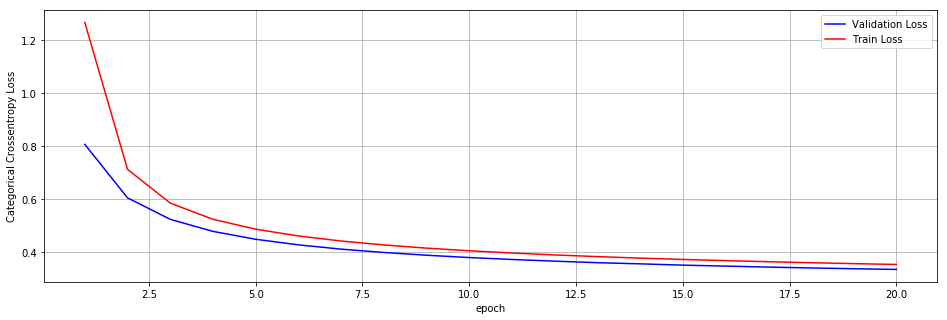

In [0]:
score = model.evaluate( xte, yte, verbose = 0 )
# Returns the loss value & metrics values for the model in test mode. Computation is done in batches.
# evaluate(x=None, y=None, batch_size=None, verbose=1, sample_weight=None, steps=None, callbacks=None)

print(' Test loss : ', score[0] * 100, ' %   Test accuracy : ', score[1] * 100, ' %')

fig, ax = plt.subplots(1,1, figsize=(16,5) )
ax.set_xlabel('epoch')
ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list( range( 1, epoch+1 ) )


# for each key in histrory.histrory we will have a list of length equal to number of epochs

vl = history.history['val_loss']
trl = history.history['loss']

plot(x, vl, trl, ax)
# plot( x, vl, trl, ax )

## MLP with Sigmoid Activation and SGD optimizer

In [0]:
modelSig = Sequential()

modelSig.add( Dense( 512, activation='sigmoid', input_shape = (ip,) ))  # simple 'ip' is giving error
modelSig.add( Dense( 128, activation='sigmoid' ))
modelSig.add( Dense( op, activation='softmax' ))

# hidden1 = 512  1st layer number of neurons
# hidden2 = 128  2nd layer number of neurons

modelSig.summary()

# 512, 128, op are units: Positive integer, dimensionality of the output space.

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2 (Dense)              (None, 512)               401920    
_________________________________________________________________
dense_3 (Dense)              (None, 128)               65664     
_________________________________________________________________
dense_4 (Dense)              (None, 10)                1290      
Total params: 468,874
Trainable params: 468,874
Non-trainable params: 0
_________________________________________________________________


In [0]:
modelSig.compile( optimizer = 'sgd', loss = 'categorical_crossentropy', metrics = ['accuracy'] )

history = modelSig.fit( xtr, ytr, batch, epoch, verbose=1, validation_data = (xte, yte) )

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 2s 27us/step - loss: 2.2588 - acc: 0.2500 - val_loss: 2.2115 - val_acc: 0.3047
Epoch 2/20
60000/60000 [==============================] - 1s 25us/step - loss: 2.1639 - acc: 0.4571 - val_loss: 2.1032 - val_acc: 0.5351
Epoch 3/20
60000/60000 [==============================] - 1s 25us/step - loss: 2.0381 - acc: 0.5722 - val_loss: 1.9497 - val_acc: 0.6490
Epoch 4/20
60000/60000 [==============================] - 2s 25us/step - loss: 1.8610 - acc: 0.6394 - val_loss: 1.7436 - val_acc: 0.6469
Epoch 5/20
60000/60000 [==============================] - 1s 25us/step - loss: 1.6400 - acc: 0.6860 - val_loss: 1.5073 - val_acc: 0.7005
Epoch 6/20
60000/60000 [==============================] - 1s 25us/step - loss: 1.4109 - acc: 0.7272 - val_loss: 1.2859 - val_acc: 0.7501
Epoch 7/20
60000/60000 [==============================] - 1s 25us/step - loss: 1.2098 - acc: 0.7589 - val_loss: 1.1032 - val_acc

 Test loss :  45.83274377584458  %   Test accuracy :  87.78  %


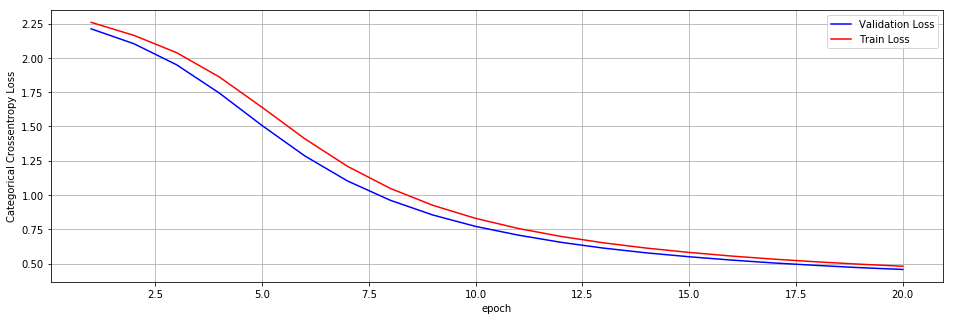

In [0]:
score = modelSig.evaluate( xte, yte, verbose = 0 )
# Returns the loss value & metrics values for the model in test mode. Computation is done in batches.
# evaluate(x=None, y=None, batch_size=None, verbose=1, sample_weight=None, steps=None, callbacks=None)

print(' Test loss : ', score[0] * 100, ' %   Test accuracy : ', score[1] * 100, ' %')

fig, ax = plt.subplots(1,1, figsize=(16,5) )
ax.set_xlabel('epoch')
ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list( range( 1, epoch+1 ) )


# for each key in histrory.histrory we will have a list of length equal to number of epochs

vl = history.history['val_loss']
trl = history.history['loss']

plot(x, vl, trl, ax)
# plot( x, vl, trl, ax )

## MLP with Sigmoid Activation and ADAM optimizer

In [0]:
modelSig = Sequential()

modelSig.add( Dense( 512, activation='sigmoid', input_shape = (ip,) ))  # simple 'ip' is giving error
modelSig.add( Dense( 128, activation='sigmoid' ))
modelSig.add( Dense( op, activation='softmax' ))

# hidden1 = 512  1st layer number of neurons
# hidden2 = 128  2nd layer number of neurons

modelSig.summary()

# 512, 128, op are units: Positive integer, dimensionality of the output space.

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_5 (Dense)              (None, 512)               401920    
_________________________________________________________________
dense_6 (Dense)              (None, 128)               65664     
_________________________________________________________________
dense_7 (Dense)              (None, 10)                1290      
Total params: 468,874
Trainable params: 468,874
Non-trainable params: 0
_________________________________________________________________


In [0]:
modelSig.compile( optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'] )

history = modelSig.fit( xtr, ytr, batch, epoch, verbose=1, validation_data = (xte, yte) )

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 2s 33us/step - loss: 0.5304 - acc: 0.8643 - val_loss: 0.2584 - val_acc: 0.9234
Epoch 2/20
60000/60000 [==============================] - 2s 29us/step - loss: 0.2207 - acc: 0.9348 - val_loss: 0.1895 - val_acc: 0.9456
Epoch 3/20
60000/60000 [==============================] - 2s 29us/step - loss: 0.1636 - acc: 0.9518 - val_loss: 0.1428 - val_acc: 0.9555
Epoch 4/20
60000/60000 [==============================] - 2s 29us/step - loss: 0.1250 - acc: 0.9628 - val_loss: 0.1276 - val_acc: 0.9614
Epoch 5/20
60000/60000 [==============================] - 2s 31us/step - loss: 0.0975 - acc: 0.9712 - val_loss: 0.1089 - val_acc: 0.9670
Epoch 6/20
60000/60000 [==============================] - 2s 33us/step - loss: 0.0787 - acc: 0.9763 - val_loss: 0.0847 - val_acc: 0.9721
Epoch 7/20
60000/60000 [==============================] - 2s 33us/step - loss: 0.0634 - acc: 0.9809 - val_loss: 0.0830 - val_acc

 Test loss :  8.329563540434174  %   Test accuracy :  97.96000000000001  %


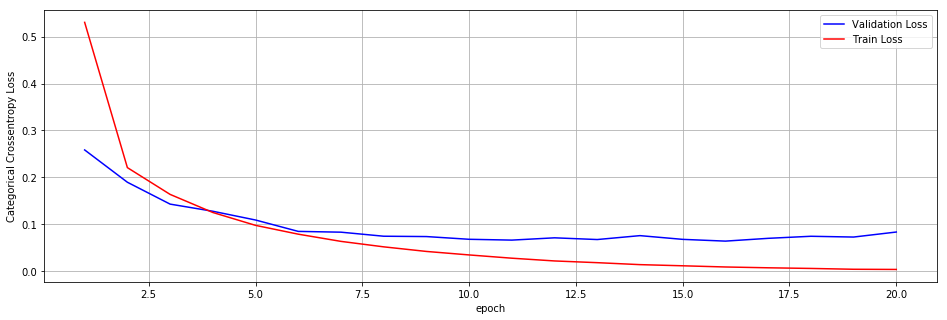

In [0]:
score = modelSig.evaluate( xte, yte, verbose = 0 )
# Returns the loss value & metrics values for the model in test mode. Computation is done in batches.
# evaluate(x=None, y=None, batch_size=None, verbose=1, sample_weight=None, steps=None, callbacks=None)

print(' Test loss : ', score[0] * 100, ' %   Test accuracy : ', score[1] * 100, ' %')

fig, ax = plt.subplots(1,1, figsize=(16,5) )
ax.set_xlabel('epoch')
ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list( range( 1, epoch+1 ) )


# for each key in histrory.histrory we will have a list of length equal to number of epochs

vl = history.history['val_loss']
trl = history.history['loss']

plot(x, vl, trl, ax)
# plot( x, vl, trl, ax )

## MLP with Sigmoid Activation ,Batch Normalization and ADAM optimizer




In [0]:
from keras.layers.normalization import BatchNormalization
from keras.initializers import RandomNormal


# If we sample weights from a normal distribution N(0,σ) we satisfy this condition with σ = √ ( 2 / ( ni + ni + 1 ) ) 
# h1 =>  σ = √ ( 2 / ( fan_in + fan_out + 1) ) = 0.039  => N(0,σ) = N(0,0.039)
# h2 =>  σ = √ ( 2 / ( fan_in + fan_out + 1) ) = 0.055  => N(0,σ) = N(0,0.055)
# out =>  σ = √ ( 2 / ( fan_in + fan_out + 1) ) = 0.120  => N(0,σ) = N(0,0.120)

# for h1 : input = 784 , hidden1 = 512  => fan_in = 784, fan_out = 512  =>  σ = √ ( 2 / ( 784 + 512 + 1) ) 
# => σ = √ ( 2 / ( 1297 ) )   => σ = √ ( 0.00154 )   => 0.3924  Similary we can Calc for 'h2' and 'out' 


modelB = Sequential()

modelB.add( Dense( 512, activation='sigmoid', input_shape=(ip,), kernel_initializer = RandomNormal(mean=0.0, stddev=0.039, seed=None) ))
modelB.add( BatchNormalization() )

modelB.add( Dense( 128, activation='sigmoid', kernel_initializer = RandomNormal(mean=0.0, stddev=0.55, seed=None) ))
modelB.add( BatchNormalization() )

modelB.add( Dense(op, activation = 'softmax') )

modelB.summary()

# RandomNormal() : Initializer that generates tensors with a normal distribution.

# Ref : # https://intoli.com/blog/neural-network-initialization/ 

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2 (Dense)              (None, 512)               401920    
_________________________________________________________________
batch_normalization_1 (Batch (None, 512)               2048      
_________________________________________________________________
dense_3 (Dense)              (None, 128)               65664     
_________________________________________________________________
batch_normalization_2 (Batch (None, 128)               512       
_________________________________________________________________
dense_4 (Dense)              (None, 10)                1290      
Total params: 471,434
Trainable params: 470,154
Non-trainable params: 1,280
_________________________________________________________________


In [0]:
modelB.compile( optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'] )

history = modelB.fit( xtr, ytr, batch, epoch, verbose=1, validation_data = (xte, yte) )

Instructions for updating:
Use tf.cast instead.
Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 6s 108us/step - loss: 0.3070 - acc: 0.9092 - val_loss: 0.2182 - val_acc: 0.9410
Epoch 2/20
60000/60000 [==============================] - 3s 57us/step - loss: 0.1754 - acc: 0.9493 - val_loss: 0.1654 - val_acc: 0.9510
Epoch 3/20
60000/60000 [==============================] - 3s 57us/step - loss: 0.1399 - acc: 0.9585 - val_loss: 0.1460 - val_acc: 0.9559
Epoch 4/20
60000/60000 [==============================] - 3s 51us/step - loss: 0.1125 - acc: 0.9668 - val_loss: 0.1346 - val_acc: 0.9606
Epoch 5/20
60000/60000 [==============================] - 3s 52us/step - loss: 0.0952 - acc: 0.9715 - val_loss: 0.1281 - val_acc: 0.9597
Epoch 6/20
60000/60000 [==============================] - 3s 51us/step - loss: 0.0818 - acc: 0.9753 - val_loss: 0.1138 - val_acc: 0.9657
Epoch 7/20
60000/60000 [==============================] - 3s 52us/step - loss: 

 Test loss :  9.374206905001484  %   Test accuracy :  97.35000000000001  %


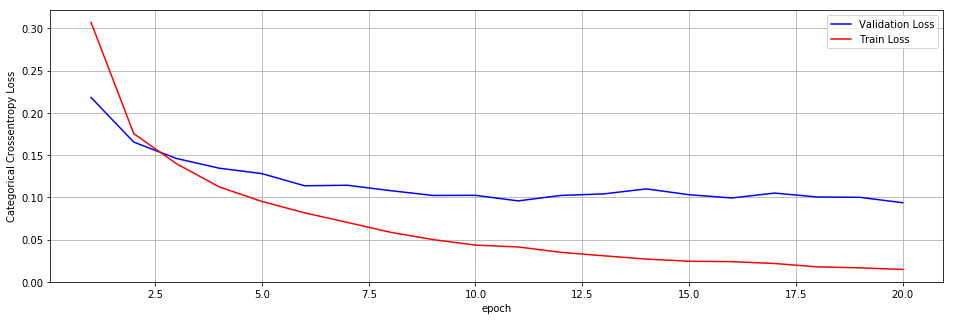

In [0]:
score = modelB.evaluate( xte, yte, verbose = 0 )
# Returns the loss value & metrics values for the model in test mode. Computation is done in batches.
# evaluate(x=None, y=None, batch_size=None, verbose=1, sample_weight=None, steps=None, callbacks=None)

print(' Test loss : ', score[0] * 100, ' %   Test accuracy : ', score[1] * 100, ' %')

fig, ax = plt.subplots(1,1, figsize=(16,5) )
ax.set_xlabel('epoch')
ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list( range( 1, epoch+1 ) )


# for each key in histrory.histrory we will have a list of length equal to number of epochs

vl = history.history['val_loss']
trl = history.history['loss']

plot(x, vl, trl, ax)
# plot( x, vl, trl, ax )

## MLP with Sigmoid Activation ,Dropout and ADAM optimizer




In [0]:
from keras.layers import Dropout
from keras.layers.normalization import BatchNormalization
from keras.initializers import RandomNormal


# If we sample weights from a normal distribution N(0,σ) we satisfy this condition with σ = √ ( 2 / ( ni + ni + 1 ) ) 
# h1 =>  σ = √ ( 2 / ( fan_in + fan_out + 1) ) = 0.039  => N(0,σ) = N(0,0.039)
# h2 =>  σ = √ ( 2 / ( fan_in + fan_out + 1) ) = 0.055  => N(0,σ) = N(0,0.055)
# out =>  σ = √ ( 2 / ( fan_in + fan_out + 1) ) = 0.120  => N(0,σ) = N(0,0.120)

# for h1 : input = 784 , hidden1 = 512  => fan_in = 784, fan_out = 512  =>  σ = √ ( 2 / ( 784 + 512 + 1) ) 
# => σ = √ ( 2 / ( 1297 ) )   => σ = √ ( 0.00154 )   => 0.3924  Similary we can Calc for 'h2' and 'out' 


modelD = Sequential()

modelD.add( Dense( 512, activation='sigmoid', input_shape=(ip,), kernel_initializer = RandomNormal(mean=0.0, stddev=0.039, seed=None) ))
modelD.add( BatchNormalization() )
modelD.add( Dropout(0.5) )

modelD.add( Dense( 128, activation='sigmoid', kernel_initializer = RandomNormal(mean=0.0, stddev=0.55, seed=None) ))
modelD.add( BatchNormalization() )
modelD.add( Dropout(0.5) )

modelD.add( Dense(op, activation = 'softmax') )

modelD.summary()

# RandomNormal() : Initializer that generates tensors with a normal distribution.

# Ref : # https://intoli.com/blog/neural-network-initialization/ 

Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_5 (Dense)              (None, 512)               401920    
_________________________________________________________________
batch_normalization_3 (Batch (None, 512)               2048      
_________________________________________________________________
dropout_1 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_6 (Dense)              (None, 128)               65664     
_________________________________________________________________
batch_normalization_4 (Batch (None, 128)               512       
_________________________________________________________________
dropout_2 (Dropout)          (None, 128)               0         
___________________________

In [0]:
modelD.compile( optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'] )

history = modelD.fit( xtr, ytr, batch, epoch, verbose=1, validation_data = (xte, yte) )

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 4s 65us/step - loss: 0.6659 - acc: 0.7932 - val_loss: 0.2826 - val_acc: 0.9169
Epoch 2/20
60000/60000 [==============================] - 3s 54us/step - loss: 0.4271 - acc: 0.8702 - val_loss: 0.2559 - val_acc: 0.9251
Epoch 3/20
60000/60000 [==============================] - 3s 54us/step - loss: 0.3831 - acc: 0.8833 - val_loss: 0.2394 - val_acc: 0.9278
Epoch 4/20
60000/60000 [==============================] - 3s 54us/step - loss: 0.3584 - acc: 0.8925 - val_loss: 0.2220 - val_acc: 0.9343
Epoch 5/20
60000/60000 [==============================] - 3s 54us/step - loss: 0.3359 - acc: 0.8979 - val_loss: 0.2153 - val_acc: 0.9381
Epoch 6/20
60000/60000 [==============================] - 3s 54us/step - loss: 0.3183 - acc: 0.9039 - val_loss: 0.2062 - val_acc: 0.9383
Epoch 7/20
60000/60000 [==============================] - 4s 60us/step - loss: 0.3083 - acc: 0.9073 - val_loss: 0.1923 - val_acc

 Test loss :  11.04182219164446  %   Test accuracy :  96.75  %


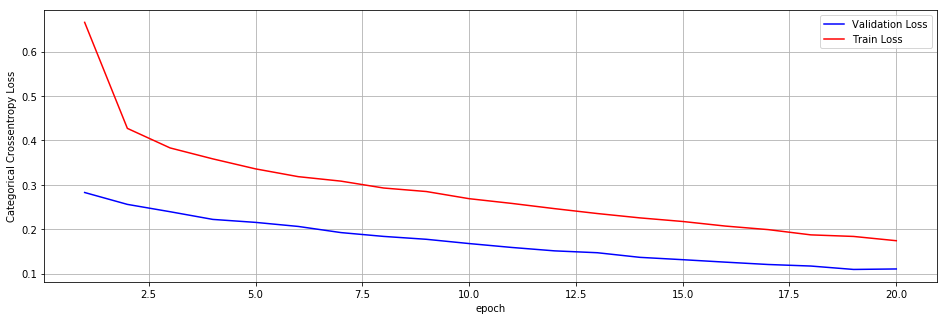

In [0]:
score = modelD.evaluate( xte, yte, verbose = 0 )
# Returns the loss value & metrics values for the model in test mode. Computation is done in batches.
# evaluate(x=None, y=None, batch_size=None, verbose=1, sample_weight=None, steps=None, callbacks=None)

print(' Test loss : ', score[0] * 100, ' %   Test accuracy : ', score[1] * 100, ' %')

fig, ax = plt.subplots(1,1, figsize=(16,5) )
ax.set_xlabel('epoch')
ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list( range( 1, epoch+1 ) )


# for each key in histrory.histrory we will have a list of length equal to number of epochs

vl = history.history['val_loss']
trl = history.history['loss']

plot(x, vl, trl, ax)
# plot( x, vl, trl, ax )

## Hyperparameter Tuning of Keras Models

In [0]:
from keras.optimizers import Adam,RMSprop,SGD

def tune( activ ):

    model = Sequential()
    model.add( Dense( 512, activation=activ, input_shape=(ip,), kernel_initializer=RandomNormal(mean=0.0, stddev=0.062, seed=None)))
    model.add( Dense( 128, activation=activ, kernel_initializer=RandomNormal(mean=0.0, stddev=0.125, seed=None)) )
    model.add( Dense( op, activation='softmax'))


    model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer='adam')
    
    return model

In [0]:

activ = ['sigmoid', 'relu']

from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import GridSearchCV

model = KerasClassifier( build_fn = tune, epochs = epoch, batch_size = batch, verbose=0)

param = dict( activ = activ )

# if you are using CPU
# grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1)
# if you are using GPU dont use the n_jobs parameter

grid = GridSearchCV( estimator = model, param_grid = param )

res = grid.fit(xtr, ytr)

# Ref : https://machinelearningmastery.com/grid-search-hyperparameters-deep-learning-models-python-keras/


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


In [0]:
print("Best : ", res.best_score_,'  using : ', res.best_params_)

means = res.cv_results_['mean_test_score']
stds = res.cv_results_['std_test_score']

params = res.cv_results_['params']

for mean, stdev, param in zip(means, stds, params):
    print(mean, stdev, " with : ", param))